## DSC530 Final Project

### Kesav Adithya Venkidusamy

### Covid-19 Impact Analysis

This project is to analyze which age group is mostly impacted by Covid-19. There is a saying that "Only older adults and people with preexisting conditions are at risk of infections and complications". This project is to analyze the datasets available in CDC to prove/disprove the assumption. 

CDC website mentioned below contains enormous datasets for Covid-19. Among numerous datasets available in CDC, we are going to consider "Covid-19 impact by Age and Sex", and "total number of Covid-19 cases by month, county" datasets to prove/disprove the above sayings.

https://data.cdc.gov/browse

#### Importing Libraries and setting up sys path

In [1]:
import pandas as pd
import sys
import warnings
import numpy as np
import datetime

warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('C:/Users/KesavAdithya/PycharmProjects/ThinkStats2/code')

import thinkstats2
import thinkplot

#### Function to create data frame

In [3]:
def dataFrameCreate(filePath,fileName):
    """
    This function is to create the dataframe for the filePatha and CSV file passed as argument
    
    filePath: Local path where file resides
    fileName: Name of the file
    
    returns: data frame for the input file
    """
    if filePath[-1] == '/':
        dataFile = filePath+fileName
    else:
        dataFile = filePath + '/' + fileName
    print(dataFile)
    df = pd.read_csv(dataFile)
    return df


#### Functions to create data sets; Below are the data sets extracted from CDC website

1. Provisional COVID-19 Deaths by Sex and Age
2. Provisional COVID-19 Deaths by Week, Sex, and Age
3. Conditions contributing to COVID-19 deaths, by state and age, provisional 2020-2021


In [4]:
def dataset_1_Creation():
    """
    This function to create the dataframe with all required row and column filters for the 1st data set
    
    returns: data frame for the input file
    """    
    covid19_death_age_sex_raw_df = dataFrameCreate('datasets','Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
    
    print("\nDataframe for covid-19 death by age and sex is created")
    covid19_death_age_sex_df = CleanCovid19DeathAgeSex(covid19_death_age_sex_raw_df)
    print("\nColumns present in the dataset and datatypes")
    print(covid19_death_age_sex_df.dtypes)
    print("\nSample data for covid-19 death by age and sex dataframe")
    print(covid19_death_age_sex_df.head(4))
    return covid19_death_age_sex_df
            

In [5]:
def dataset_2_Creation():
    """
    This function to create the dataframe with all required row and column filters for the 2nd data set
    
    returns: data frame for the 2nd input file
    """
    
    covid19_death_age_disease_raw_df = dataFrameCreate('datasets','COVID-19_Deaths_by_State_and_Age.csv')
    
    print("\nDataframe for covid-19 death by age and other disease is created")
    covid19_death_age_disease_df = CleanCovid19DeathAgeDisease(covid19_death_age_disease_raw_df)
    print("\nColumns present in the dataset and datatypes")
    print(covid19_death_age_disease_df.dtypes)
    print("\nSample data for covid-19 death by age and disease dataframe")
    print(covid19_death_age_disease_df.head(4))
    
    return covid19_death_age_disease_df


In [6]:
def dataset_3_Creation():
    
    """
    This function to create the dataframe with all required row and column filters for the 3rd data set
    
    returns: data frame for the 3rd input file
    """
    
    covid19_death_age_sex_week_raw_df = dataFrameCreate('datasets','Provisional_COVID-19_Deaths_by_Week_Sex_and_Age.csv')
    
    print("\nDataframe for covid-19 death by age and other disease for week is created")
    covid19_death_age_sex_week_df = CleanCovid19DeathAgeSexWeek(covid19_death_age_sex_week_raw_df)
    print("\nColumns present in the dataset and datatypes")
    print(covid19_death_age_sex_week_df.dtypes)
    print("\nSample data for covid-19 death by age and disease dataframe")
    print(covid19_death_age_sex_week_df.head(4))
    
    return covid19_death_age_sex_week_df

#### Functions to perform data wrangling and cleaning for the given data sets

Data cleaning is performed on all the data sets to filter the unwanted records. In addition, the datatypes for some of the columns are changed based on their types  

In [7]:
def CleanCovid19DeathAgeSex(df):
    """
    This function is to clean the 1st input data by applying all the filter condition
    
    return: Final dataframe after data wrangling 
    
    """
    df = df[["Start Date","End Date","Group","State","Sex","Age Group","COVID-19 Deaths","Total Deaths"]]
    df = df.fillna(0)
    df['year'] = pd.DatetimeIndex(df['End Date']).year
    df['month'] = pd.DatetimeIndex(df['End Date']).month
    rename_df = df.rename(columns={'Start Date':'start_date','End Date':'end_date','Group':'group','State':'state','Sex':'sex','Age Group':'age_group','COVID-19 Deaths':'covid_deaths','Total Deaths':'total_deaths'})
    age_grp_filter = ['All Ages']
    final_df = rename_df[(rename_df.group == 'By Month') & (rename_df.state == 'United States') & (~rename_df.age_group.isin(age_grp_filter)) & (rename_df.sex == 'All Sexes')]
    final_df['start_date'] = pd.to_datetime(final_df['start_date'])
    final_df['end_date'] = pd.to_datetime(final_df['end_date'])
    final_df['covid_deaths'] = final_df['covid_deaths'].str.replace(',','').astype('float')
    final_df['total_deaths'] = final_df['total_deaths'].str.replace(',','').astype('float')
    final_df = final_df[(final_df.end_date < "2021-07-01")]
    print(final_df.count())
    return final_df


In [8]:
def CleanCovid19DeathAgeDisease(df):
    """
    This function is to clean the 2nd input data by applying all the filter condition
    
    return: Final dataframe after data wrangling 
    """
    df = df[['Start Date','End Date','Group','State','Condition Group','Condition','Age Group','COVID-19 Deaths']]
    df = df.fillna(0)
    df['year'] = pd.DatetimeIndex(df['End Date']).year
    df['month'] = pd.DatetimeIndex(df['End Date']).month
    rename_df = df.rename(columns={'Start Date':'start_date','End Date':'end_date','Group':'group','State':'state','Condition Group':'condition_group','Condition':'condition','Age Group':'age_group','COVID-19 Deaths':'covid_deaths'})
    age_grp_filter = ['Not states','All Ages']
    final_df = rename_df[(rename_df.group == 'By Month') & (rename_df.state == 'United States') & (~rename_df.age_group.isin(age_grp_filter))]
    final_df['start_date'] = pd.to_datetime(final_df['start_date'])
    final_df['end_date'] = pd.to_datetime(final_df['end_date'])
    final_df['covid_deaths'] = final_df['covid_deaths'].str.replace(',','').astype('float')
    final_df = final_df[(final_df.start_date > "2020-03-01") & (final_df.end_date < "2021-07-01")]
    print(final_df.count())
    return final_df


In [9]:
def CleanCovid19DeathAgeSexWeek(df):
    """
    This function is to clean the 3rd input data by applying all the filter condition
    
    return: Final dataframe after data wrangling 
    """
    df = df[["State","MMWR Week","End Week","Sex","Age Group","Total Deaths","COVID-19 Deaths"]]
    df = df.fillna(0)
    df['year'] = pd.DatetimeIndex(df['End Week']).year
    df['month'] = pd.DatetimeIndex(df['End Week']).month
    rename_df = df.rename(columns={'State':'state','MMWR Week':'mmwr_week','End Week':'end_week','Sex':'sex','Age Group':'age_group','Total Deaths':'total_deaths','COVID-19 Deaths':'covid_deaths'})
    age_grp_filter = ['All Ages']
    final_df = rename_df[(~rename_df.age_group.isin(age_grp_filter)) & (rename_df.sex == 'All Sex')]
    final_df['end_week'] = pd.to_datetime(final_df['end_week'])
    final_df['covid_deaths'] = final_df['covid_deaths'].str.replace(',','').astype('float')
    final_df['total_deaths'] = final_df['total_deaths'].str.replace(',','').astype('float')
    final_df = final_df[(final_df.end_week > "2020-04-01") & (final_df.end_week < "2021-07-01")]
    print(final_df.count())
    return final_df

#### Source dataframe creation

Creating dataframe for dataset for Covid-19 deaths by age and sex. This dataset contains the conditions/cause for the deaths  

In [10]:
cdeath_agesex_df = dataset_1_Creation()
cdeath_agesex_df = cdeath_agesex_df.reset_index(drop=True)

datasets/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv

Dataframe for covid-19 death by age and sex is created
start_date      288
end_date        288
group           288
state           288
sex             288
age_group       288
covid_deaths    288
total_deaths    288
year            288
month           288
dtype: int64

Columns present in the dataset and datatypes
start_date      datetime64[ns]
end_date        datetime64[ns]
group                   object
state                   object
sex                     object
age_group               object
covid_deaths           float64
total_deaths           float64
year                     int64
month                    int64
dtype: object

Sample data for covid-19 death by age and sex dataframe
     start_date   end_date     group          state        sex     age_group  \
8263 2020-01-01 2020-01-31  By Month  United States  All Sexes  Under 1 year   
8264 2020-01-01 2020-01-31  By Month  United States  All Sexes    0-17 years   
8265 202

Creating dataframe for the dataset which contains Covid-19 deaths by age and underlying conditions. This data set is extracted from CDC website. From the extracted CDC data, I have considered the data from 2020-04 to 2021-06 for the analysis. Below are the variables present in the data set.

1. Start Date - First week-ending date of data period
2. End Date - Last week-ending date of data period
3. Group - Time-period Indicator for record: by Month, by Year, Total
4. State - Jurisdiction of occurrence 
5. Condition - Condition contributing to deaths involving COVID-19
6. Age Group - Age group
7. COVID-19 Deaths - COVID 19 Deaths

In [11]:
cdeath_agedisease_df = dataset_2_Creation()
cdeath_agedisease_df = cdeath_agedisease_df.reset_index(drop=True)

datasets/COVID-19_Deaths_by_State_and_Age.csv

Dataframe for covid-19 death by age and other disease is created
start_date         3105
end_date           3105
group              3105
state              3105
condition_group    3105
condition          3105
age_group          3105
covid_deaths       3105
year               3105
month              3105
dtype: int64

Columns present in the dataset and datatypes
start_date         datetime64[ns]
end_date           datetime64[ns]
group                      object
state                      object
condition_group            object
condition                  object
age_group                  object
covid_deaths              float64
year                        int64
month                       int64
dtype: object

Sample data for covid-19 death by age and disease dataframe
      start_date   end_date     group          state       condition_group  \
37263 2020-04-01 2020-04-30  By Month  United States  Respiratory diseases   
37264 2020-05-01 2

Creating dataframe for the dataset containing Covid-19 deaths weekly count by Age and sex. This data set is also extracted from CDC. From the extracted CDC data, I have considered the data from 2020-04 to 2021-06 for the analysis. Below are the variables present in the data set.

1. Data as of – Date of Analysis
2. State - Jurisdiction of occurrence
3. MMWR Week – MMWR week number
4. End Week - Last week-ending date of data period
5. Sex - Sex
6. Age Group - Age group
7. Total Deaths – Deaths from all causes of deaths
8. COVID-19 Deaths - Deaths Involving COVID-19


In [12]:
cdeath_agesex_week_df = dataset_3_Creation()
cdeath_agesex_week_df = cdeath_agesex_week_df.reset_index(drop=True)

datasets/Provisional_COVID-19_Deaths_by_Week_Sex_and_Age.csv

Dataframe for covid-19 death by age and other disease for week is created
state           715
mmwr_week       715
end_week        715
sex             715
age_group       715
total_deaths    715
covid_deaths    715
year            715
month           715
dtype: int64

Columns present in the dataset and datatypes
state                   object
mmwr_week                int64
end_week        datetime64[ns]
sex                     object
age_group               object
total_deaths           float64
covid_deaths           float64
year                     int64
month                    int64
dtype: object

Sample data for covid-19 death by age and disease dataframe
             state  mmwr_week   end_week      sex     age_group  total_deaths  \
469  United States         14 2020-04-04  All Sex  Under 1 year         343.0   
470  United States         14 2020-04-04  All Sex     1-4 Years          58.0   
471  United States         1

### Data set: weekly_covid_death_age_sex

#### Data Transformation

Among the above 3 datasets, only 2nd and 3rd are considered for this project's analysis

Adding a field called "age_split" to the 2nd dataset (covid death weekly count by age and sex) based on age. People's age less than 55 is considered as Young people and those having age greater than 55 are considered as old people.

In [13]:
less_55_years = ['Under 1 year','1-4 Years','5-14 Years','15-24 Years','25-34 Years','35-44 Years','45-54 Years']
cdeath_agesex_week_df['age_split'] = np.where(cdeath_agesex_week_df.age_group.isin(less_55_years),'Young','Old')

Displaying the data after adding additional field

In [14]:
cdeath_agesex_week_df.head(4)

,state,mmwr_week,end_week,sex,age_group,total_deaths,covid_deaths,year,month,age_split
0,United States,14,2020-04-04,All Sex,Under 1 year,343.0,1.0,2020,4,Young
1,United States,14,2020-04-04,All Sex,1-4 Years,58.0,0.0,2020,4,Young
2,United States,14,2020-04-04,All Sex,5-14 Years,98.0,0.0,2020,4,Young
3,United States,14,2020-04-04,All Sex,15-24 Years,619.0,14.0,2020,4,Young


Aggregate the count of deaths by age and week. Then, rounding off the count of deaths to nearest 100th place

In [15]:
cdeath_agesex_week_grp_df = cdeath_agesex_week_df.groupby(['age_split','end_week']).agg({'covid_deaths':['sum']})
cdeath_agesex_week_grp_df.columns = ['covid_deaths_sum']
cdeath_agesex_week_grp_df = cdeath_agesex_week_grp_df.reset_index()
cdeath_agesex_week_grp_df['covid_deaths_sum'] = (cdeath_agesex_week_grp_df['covid_deaths_sum']/100).astype(int)*100
cdeath_agesex_week_grp_df.head(4)

,age_split,end_week,covid_deaths_sum
0,Old,2020-04-04,9000
1,Old,2020-04-11,15000
2,Old,2020-04-18,15900
3,Old,2020-04-25,14500


Splitting the source dataframe into 2 dataframes; One having records with young people and another having records for old people 

Displaying the sample for both the dataframes

In [16]:
cdeath_agesex_week_grp_young_df = cdeath_agesex_week_grp_df[(cdeath_agesex_week_grp_df.age_split == 'Young')]
cdeath_agesex_week_grp_old_df = cdeath_agesex_week_grp_df[(cdeath_agesex_week_grp_df.age_split == 'Old')]

In [222]:
cdeath_agesex_week_grp_young_df.head(4)

,age_split,end_week,covid_deaths_sum
65,Young,2020-04-04,1100
66,Young,2020-04-11,1300
67,Young,2020-04-18,1200
68,Young,2020-04-25,1000


In [221]:
cdeath_agesex_week_grp_old_df.head(4)

,age_split,end_week,covid_deaths_sum
0,Old,2020-04-04,9000
1,Old,2020-04-11,15000
2,Old,2020-04-18,15000
3,Old,2020-04-25,14000


#### Histograms for 1st data set

Converting the values of Covid death variable to nearest thousands and plotting histogram for the variable

In [19]:
cdeath_agesex_week_grp_young_df['covid_deaths_sum'] = (cdeath_agesex_week_grp_young_df['covid_deaths_sum']/100).astype(int) * 100

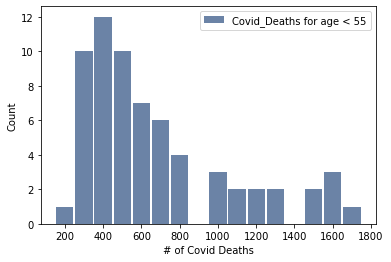

In [20]:
hist = thinkstats2.Hist(cdeath_agesex_week_grp_young_df.covid_deaths_sum, label='Covid_Deaths for age < 55')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# of Covid Deaths', ylabel='Count')
#thinkplot.Show()

In [21]:
cdeath_agesex_week_grp_old_df['covid_deaths_sum'] = (cdeath_agesex_week_grp_old_df['covid_deaths_sum']/1000).astype(int)*1000

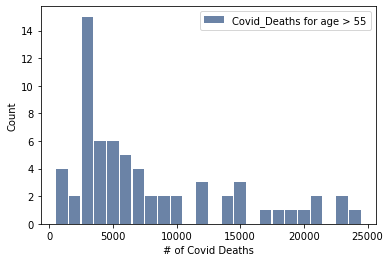

In [22]:
hist = thinkstats2.Hist(cdeath_agesex_week_grp_old_df.covid_deaths_sum, label='Covid_Deaths for age > 55')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# of Covid Deaths', ylabel='Count')
#thinkplot.Show()

Observation from histograms: Both the histograms created for number of covid deaths of the people having age less than 55 and greater than 55 are having positive skewess (Right skewed)

In [242]:
cdeath_age_deaths_grp_df = cdeath_agesex_week_df.groupby(['age_group']).agg({'covid_deaths':['sum']})
cdeath_age_deaths_grp_df.columns = ['covid_deaths_sum']
cdeath_age_deaths_grp_df = cdeath_age_deaths_grp_df.reset_index()

In [243]:
cdeath_age_deaths_grp_df.head(4)

,age_group,covid_deaths_sum
0,1-4,43.0
1,15-24,1008.0
2,25-34,4381.0
3,35-44,11075.0


<BarContainer object of 11 artists>

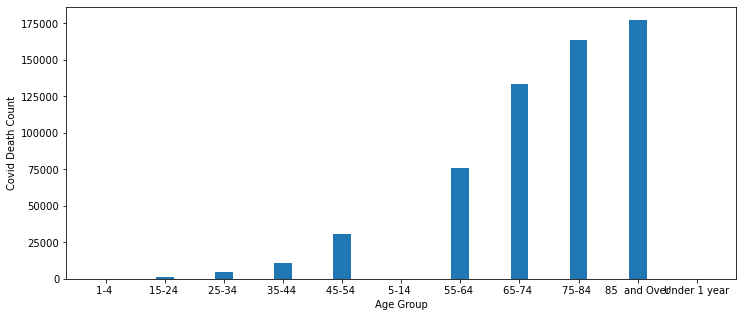

In [244]:
f_covid_age = plt.figure()
f_covid_age.set_figwidth(12)
f_covid_age.set_figheight(5)
xs_covid_age = cdeath_age_deaths_grp_df['age_group']
ys_covid_age = cdeath_age_deaths_grp_df['covid_deaths_sum']

plt.xlabel('Age Group')
plt.ylabel('Covid Death Count')
plt.bar(xs_covid_age, ys_covid_age, width=0.3)

In [246]:
cdeath_week_deaths_grp_df = cdeath_agesex_week_df.groupby(['end_week']).agg({'covid_deaths':['sum']})
cdeath_week_deaths_grp_df.columns = ['covid_deaths_sum']
cdeath_week_deaths_grp_df = cdeath_week_deaths_grp_df.reset_index()

In [247]:
cdeath_week_deaths_grp_df.head(4)

,end_week,covid_deaths_sum
0,2020-04-04,10126.0
1,2020-04-11,16317.0
2,2020-04-18,17199.0
3,2020-04-25,15550.0


<BarContainer object of 65 artists>

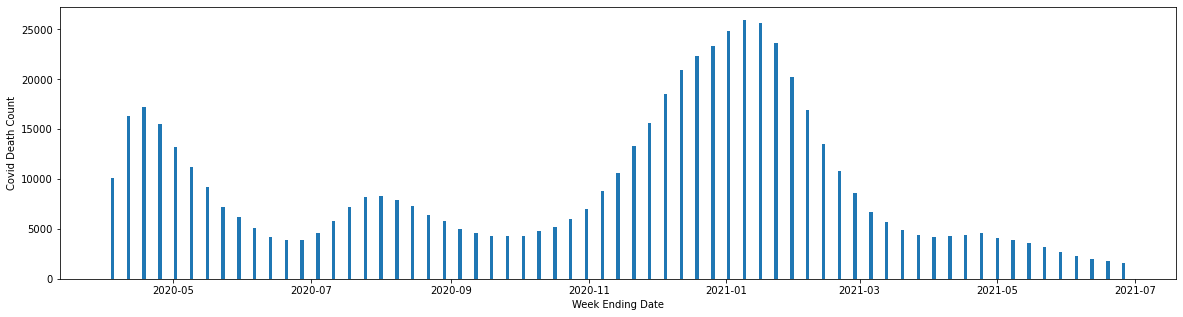

In [254]:
f_covid_week = plt.figure()
f_covid_week.set_figwidth(20)
f_covid_week.set_figheight(5)
xs_covid_week = cdeath_week_deaths_grp_df['end_week']
ys_covid_week = cdeath_week_deaths_grp_df['covid_deaths_sum']

plt.xlabel('Week Ending Date')
plt.ylabel('Covid Death Count')
plt.bar(xs_covid_week, ys_covid_week, width=1.5)

#### Summary Statistics for 1st data set

Mean, variance and standard deviation for number of covid deaths of all ages

In [23]:
cdeath_mean = cdeath_agesex_week_grp_df.covid_deaths_sum.mean()
cdeath_var = cdeath_agesex_week_grp_df.covid_deaths_sum.var()
cdeath_std = cdeath_agesex_week_grp_df.covid_deaths_sum.std()
print("The mean of covid deaths of all ages across weeks: {:.2f}".format(cdeath_mean))
print("The variance of covid deaths of all ages across weeks: {:.2f}".format(cdeath_var))
print("The standard deviation of covid deaths of all ages across weeks: {:.2f}".format(cdeath_std))

The mean of covid deaths of all ages across weeks: 4556.15
The variance of covid deaths of all ages across weeks: 35304186.64
The standard deviation of covid deaths of all ages across weeks: 5941.73


Mean, variance and standard deviation for number of covid deaths for the younger people

In [24]:
cdeath_y_mean = cdeath_agesex_week_grp_young_df.covid_deaths_sum.mean()
cdeath_y_var = cdeath_agesex_week_grp_young_df.covid_deaths_sum.var()
cdeath_y_std = cdeath_agesex_week_grp_young_df.covid_deaths_sum.std()
print("The mean of covid deaths of young age across weeks: {:.2f}".format(cdeath_y_mean))
print("The variance of covid deaths of young age across weeks: {:.2f}".format(cdeath_y_var))
print("The standard deviation of covid deaths of young age across weeks: {:.2f}".format(cdeath_y_std))

The mean of covid deaths of young age across weeks: 681.54
The variance of covid deaths of young age across weeks: 155278.85
The standard deviation of covid deaths of young age across weeks: 394.05


Mean, variance and standard deviation for number of covid deaths for the older people

In [25]:
cdeath_o_mean = cdeath_agesex_week_grp_old_df.covid_deaths_sum.mean()
cdeath_o_var = cdeath_agesex_week_grp_old_df.covid_deaths_sum.var()
cdeath_o_std = cdeath_agesex_week_grp_old_df.covid_deaths_sum.std()
print("The mean of covid deaths of young age across weeks: {:.2f}".format(cdeath_o_mean))
print("The variance of covid deaths of young age across weeks: {:.2f}".format(cdeath_o_var))
print("The standard deviation of covid deaths of young age across weeks: {:.2f}".format(cdeath_o_std))

The mean of covid deaths of young age across weeks: 7907.69
The variance of covid deaths of young age across weeks: 40366346.15
The standard deviation of covid deaths of young age across weeks: 6353.45


#### PMF for 1st data set

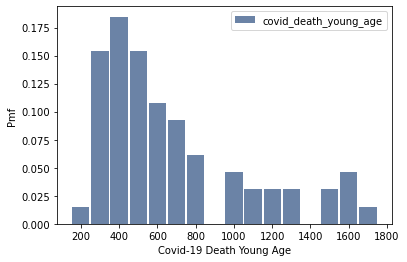

In [26]:
pmf = thinkstats2.Pmf(cdeath_agesex_week_grp_young_df.covid_deaths_sum, label='covid_death_young_age')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Covid-19 Death Young Age', ylabel='Pmf')

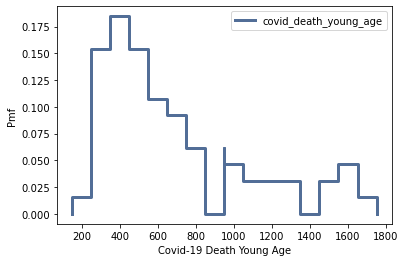

In [27]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Covid-19 Death Young Age', ylabel='Pmf')

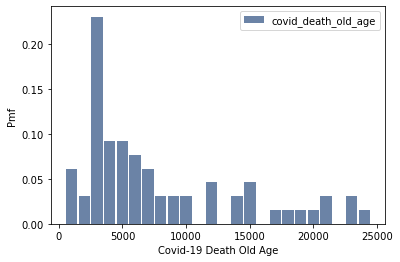

In [28]:
pmf = thinkstats2.Pmf(cdeath_agesex_week_grp_old_df.covid_deaths_sum, label='covid_death_old_age')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Covid-19 Death Old Age', ylabel='Pmf')

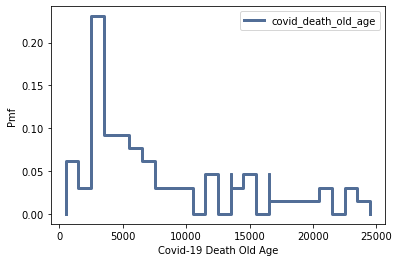

In [29]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Covid-19 Death Old Age', ylabel='Pmf')

### Data set: covid_death_age_underlying_disease

#### Data Transformation

Showing sample from dataframe and count of records present in the dataframe after data cleaning

In [200]:
cdeath_agedisease_df.head(4)

,start_date,end_date,group,state,condition_group,condition,age_group,covid_deaths,year,month,underlying_condition
0,2020-04-01,2020-04-30,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,27.0,2020,4,Yes
1,2020-05-01,2020-05-31,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,19.0,2020,5,Yes
2,2020-06-01,2020-06-30,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,17.0,2020,6,Yes
3,2020-07-01,2020-07-31,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,38.0,2020,7,Yes


In [31]:
cdeath_agedisease_df.count()

start_date         3105
end_date           3105
group              3105
state              3105
condition_group    3105
condition          3105
age_group          3105
covid_deaths       3105
year               3105
month              3105
dtype: int64

Adding additional variable called "underlying condition" derived from "condition" variable to denote if the person is having underlying disease or not 

In [32]:
cdeath_agedisease_df['underlying_condition'] = np.where(cdeath_agedisease_df.condition == 'COVID-19','No','Yes')

In [33]:
cdeath_agedisease_df.head(4)

,start_date,end_date,group,state,condition_group,condition,age_group,covid_deaths,year,month,underlying_condition
0,2020-04-01,2020-04-30,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,27.0,2020,4,Yes
1,2020-05-01,2020-05-31,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,19.0,2020,5,Yes
2,2020-06-01,2020-06-30,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,17.0,2020,6,Yes
3,2020-07-01,2020-07-31,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,38.0,2020,7,Yes


Transformation (group by) to get covid deaths by underlying condition and month

In [34]:
cdeath_agedisease_grp_df = cdeath_agedisease_df.groupby(['underlying_condition','start_date']).agg({'covid_deaths':['sum']})
cdeath_agedisease_grp_df.columns = ['covid_deaths_sum']
cdeath_agedisease_grp_df = cdeath_agedisease_grp_df.reset_index()
cdeath_agedisease_grp_df.head(4)

,underlying_condition,start_date,covid_deaths_sum
0,No,2020-04-01,65466.0
1,No,2020-05-01,38288.0
2,No,2020-06-01,17994.0
3,No,2020-07-01,31095.0


Coverting the covid death count to nearest thousands

In [35]:
cdeath_agedisease_grp_df['covid_deaths_sum'] = (cdeath_agedisease_grp_df['covid_deaths_sum']/10000).astype(int)*10

In [36]:
cdeath_agedisease_grp_df.head(5)

,underlying_condition,start_date,covid_deaths_sum
0,No,2020-04-01,60
1,No,2020-05-01,30
2,No,2020-06-01,10
3,No,2020-07-01,30
4,No,2020-08-01,20


Splitting the source dataframe into 2 dataframe; One having the records for the people with underlying condition and another for the people without any disease

Displaying sample from both the dataframes

In [37]:
cdeath_agedisease_grp_underlying_no_df = cdeath_agedisease_grp_df[(cdeath_agedisease_grp_df.underlying_condition == 'No')]
cdeath_agedisease_grp_underlying_yes_df = cdeath_agedisease_grp_df[(cdeath_agedisease_grp_df.underlying_condition == 'Yes')]

In [38]:
cdeath_agedisease_grp_underlying_no_df.head(4)

,underlying_condition,start_date,covid_deaths_sum
0,No,2020-04-01,60
1,No,2020-05-01,30
2,No,2020-06-01,10
3,No,2020-07-01,30


#### Histograms for 2nd data set

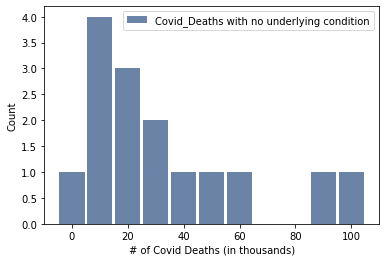

In [39]:
hist = thinkstats2.Hist(cdeath_agedisease_grp_underlying_no_df.covid_deaths_sum, label='Covid_Deaths with no underlying condition')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# of Covid Deaths (in thousands)', ylabel='Count')

In [40]:
cdeath_agedisease_grp_underlying_yes_df.head(4)

,underlying_condition,start_date,covid_deaths_sum
15,Yes,2020-04-01,160
16,Yes,2020-05-01,90
17,Yes,2020-06-01,40
18,Yes,2020-07-01,80


Rounding off the covid deaths values for those having underlying conditions to nearest 25

In [41]:
cdeath_agedisease_grp_underlying_yes_df['covid_deaths_sum'] = (cdeath_agedisease_grp_underlying_yes_df['covid_deaths_sum']/25).astype(int)*25
cdeath_agedisease_grp_underlying_yes_df.head(5)

,underlying_condition,start_date,covid_deaths_sum
15,Yes,2020-04-01,150
16,Yes,2020-05-01,75
17,Yes,2020-06-01,25
18,Yes,2020-07-01,75
19,Yes,2020-08-01,75


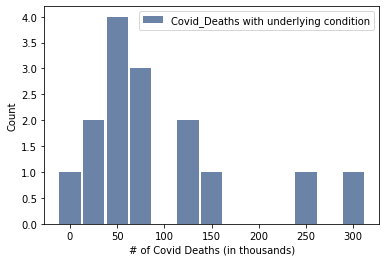

In [42]:
hist = thinkstats2.Hist(cdeath_agedisease_grp_underlying_yes_df.covid_deaths_sum, label='Covid_Deaths with underlying condition')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# of Covid Deaths (in thousands)', ylabel='Count')

In [266]:
cdeath_agedisease_df_filter_cond = cdeath_agedisease_df[(cdeath_agedisease_df.condition_group != 'COVID-19')]
cdeath_cond_deaths_grp_df = cdeath_agedisease_df_filter_cond.groupby(['condition_group']).agg({'covid_deaths':['sum']})
cdeath_cond_deaths_grp_df.columns = ['covid_deaths_sum']
cdeath_cond_deaths_grp_df = cdeath_cond_deaths_grp_df.reset_index()

In [267]:
cdeath_cond_deaths_grp_df.head(4)

,condition_group,covid_deaths_sum
0,All other conditions and causes (residual),232053.0
1,Alzheimer disease,21445.0
2,Circulatory diseases,414852.0
3,Diabetes,95623.0


<BarContainer object of 11 artists>

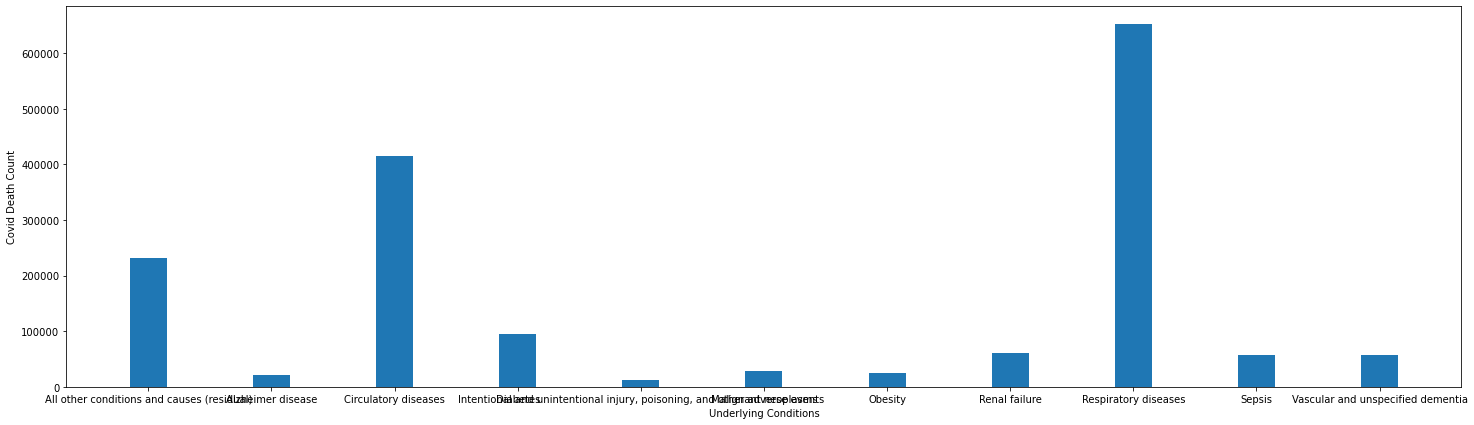

In [279]:
f_covid_cond = plt.figure()
f_covid_cond.set_figwidth(25)
f_covid_cond.set_figheight(7)
xs_covid_cond = cdeath_cond_deaths_grp_df['condition_group']
ys_covid_cond = cdeath_cond_deaths_grp_df['covid_deaths_sum']

plt.xlabel('Underlying Conditions')
plt.ylabel('Covid Death Count')
plt.bar(xs_covid_cond, ys_covid_cond, width=0.3)

#### Summary Statistics for 2nd data set

In [43]:
cdeath_nou_mean = cdeath_agedisease_grp_underlying_no_df.covid_deaths_sum.mean()
cdeath_nou_var = cdeath_agedisease_grp_underlying_no_df.covid_deaths_sum.var()
cdeath_nou_std = cdeath_agedisease_grp_underlying_no_df.covid_deaths_sum.std()
print("The mean of covid deaths of young age across weeks: {:.2f}".format(cdeath_nou_mean))
print("The variance of covid deaths of young age across weeks: {:.2f}".format(cdeath_nou_var))
print("The standard deviation of covid deaths of young age across weeks: {:.2f}".format(cdeath_nou_std))

The mean of covid deaths of young age across weeks: 33.33
The variance of covid deaths of young age across weeks: 895.24
The standard deviation of covid deaths of young age across weeks: 29.92


In [44]:
cdeath_u_mean = cdeath_agedisease_grp_underlying_yes_df.covid_deaths_sum.mean()
cdeath_u_var = cdeath_agedisease_grp_underlying_yes_df.covid_deaths_sum.var()
cdeath_u_std = cdeath_agedisease_grp_underlying_yes_df.covid_deaths_sum.std()
print("The mean of covid deaths of young age across weeks: {:.2f}".format(cdeath_u_mean))
print("The variance of covid deaths of young age across weeks: {:.2f}".format(cdeath_u_var))
print("The standard deviation of covid deaths of young age across weeks: {:.2f}".format(cdeath_u_std))

The mean of covid deaths of young age across weeks: 95.00
The variance of covid deaths of young age across weeks: 7071.43
The standard deviation of covid deaths of young age across weeks: 84.09


#### PMF for 2nd data set

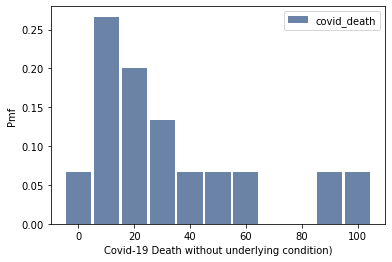

In [45]:
pmf = thinkstats2.Pmf(cdeath_agedisease_grp_underlying_no_df.covid_deaths_sum, label='covid_death')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Covid-19 Death without underlying condition)', ylabel='Pmf')

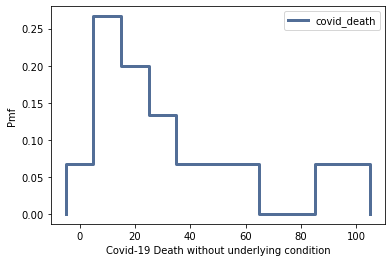

In [46]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Covid-19 Death without underlying condition', ylabel='Pmf')

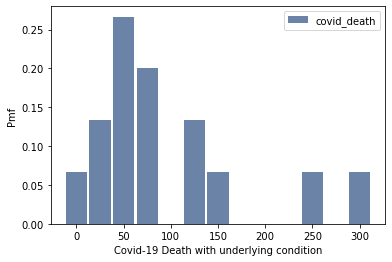

In [47]:
pmf = thinkstats2.Pmf(cdeath_agedisease_grp_underlying_yes_df.covid_deaths_sum, label='covid_death')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Covid-19 Death with underlying condition', ylabel='Pmf')

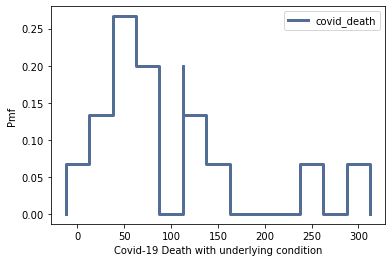

In [48]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Covid-19 Death with underlying condition', ylabel='Pmf')

### CDF

Applying CDF for the monthly covid death by age and underlying condition data set and weekly covid deaths by age and sex 

In [49]:
cdf = thinkstats2.Cdf(cdeath_agedisease_grp_df.covid_deaths_sum, label='Covid-19 deaths')

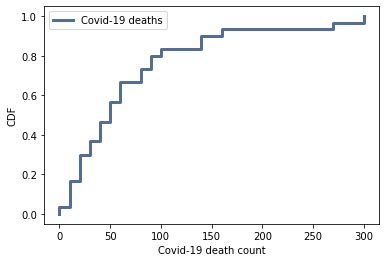

<Figure size 576x432 with 0 Axes>

In [50]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Covid-19 death count', ylabel='CDF')

In [201]:
cdf1 = thinkstats2.Cdf(cdeath_agesex_week_grp_df.covid_deaths_sum, label='Covid-19 deaths')

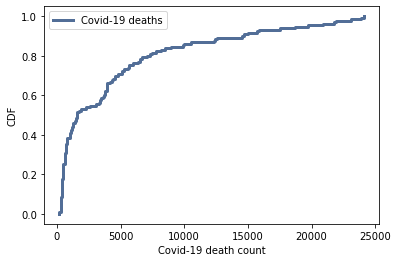

<Figure size 576x432 with 0 Axes>

In [202]:
thinkplot.Cdf(cdf1)
thinkplot.Show(xlabel='Covid-19 death count', ylabel='CDF')

Observation: One way to read CDF is to look up percentiles. Here, around 80% of the Covid deaths are less than or equal to 7500 which corresponds to young people having age less than 55.

#### Analytical Distribution

Mean:  673.015873015873
Var:  137525.82514487277
Sigma:  370.8447453380899


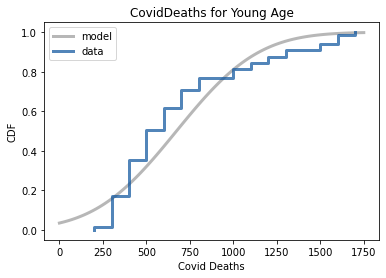

In [105]:
#Analytical Distribution

youngdeaths = cdeath_agesex_week_grp_young_df.covid_deaths_sum.dropna()

mu, var = thinkstats2.TrimmedMeanVar(youngdeaths, p=0.02)
print('Mean: ', mu)
print('Var: ',var)

sigma = np.sqrt(var)
print('Sigma: ', sigma)

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=1750)

thinkplot.Plot(xs, ps, label='model', color='0.6')
cdf= thinkstats2.Cdf(youngdeaths, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title ='CovidDeaths for Young Age',
                 xlabel= 'Covid Deaths',
                 ylabel= 'CDF')

Mean:  7761.9047619047615
Var:  36117913.83219954
Sigma:  6009.818119727048


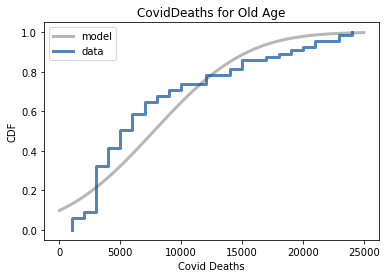

In [107]:
#Analytical Distribution

olddeaths = cdeath_agesex_week_grp_old_df.covid_deaths_sum.dropna()

mu, var = thinkstats2.TrimmedMeanVar(olddeaths, p=0.02)
print('Mean: ', mu)
print('Var: ',var)

sigma = np.sqrt(var)
print('Sigma: ', sigma)

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=25000)

thinkplot.Plot(xs, ps, label='model', color='0.6')
cdf= thinkstats2.Cdf(olddeaths, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title ='CovidDeaths for Old Age',
                 xlabel= 'Covid Deaths',
                 ylabel= 'CDF')

#### Scatter Plot

In [122]:
cdeath_agesex_week_df['age_group'] = cdeath_agesex_week_df['age_group'].str.replace('Years','')
cdeath_agesex_week_df.head(4)

,state,mmwr_week,end_week,sex,age_group,total_deaths,covid_deaths,year,month,age_split
0,United States,14,2020-04-04,All Sex,Under 1 year,343.0,1.0,2020,4,Young
1,United States,14,2020-04-04,All Sex,1-4,58.0,0.0,2020,4,Young
2,United States,14,2020-04-04,All Sex,5-14,98.0,0.0,2020,4,Young
3,United States,14,2020-04-04,All Sex,15-24,619.0,14.0,2020,4,Young


In [126]:
import matplotlib.pyplot as plt

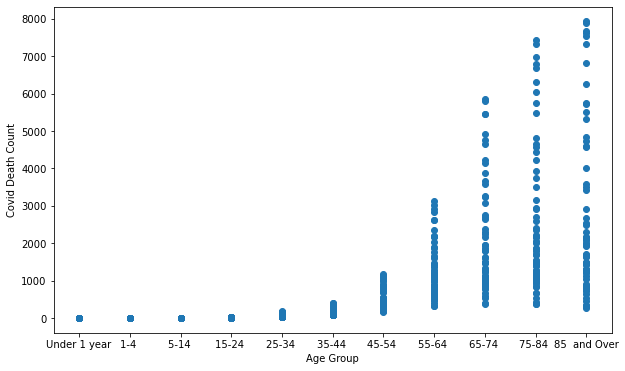

In [131]:
#Scatter Plot of 2 variables

#Weekly covid death count by Age 
age_grp, covid_deaths = cdeath_agesex_week_df.age_group, cdeath_agesex_week_df.covid_deaths

plt.figure(figsize=(10, 6))
plt.xlabel("Age Group")
plt.ylabel("Covid Death Count")
plt.scatter(age_grp, covid_deaths)

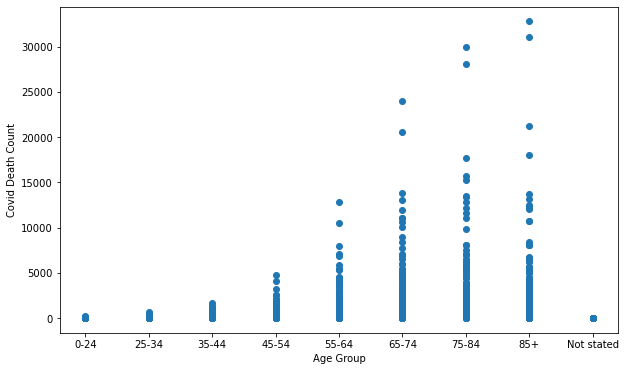

In [136]:
#Covid deaths by Age with and without underlying condition

age_grp, covid_deaths = cdeath_agedisease_df.age_group, cdeath_agedisease_df.covid_deaths

plt.figure(figsize=(10, 6))
plt.xlabel("Age Group")
plt.ylabel("Covid Death Count")
plt.scatter(age_grp, covid_deaths)

### Correlation

In [142]:
from scipy import stats

In [144]:
#Parametric test using one-way anova
young = cdeath_agesex_week_df[cdeath_agesex_week_df.age_split == 'Young'].covid_deaths.dropna()
old = cdeath_agesex_week_df[cdeath_agesex_week_df.age_split == 'Old'].covid_deaths.dropna()

F, p = stats.f_oneway(young, old)
print(F, p)

558.9702216741833 1.0799474278897298e-91


In [146]:
#Non-parametric test for correlation with categorical data

young = cdeath_agesex_week_df[cdeath_agesex_week_df.age_split == 'Young'].covid_deaths.dropna()
old = cdeath_agesex_week_df[cdeath_agesex_week_df.age_split == 'Old'].covid_deaths.dropna()

F, p = stats.kruskal(young, old)
print(F)

474.7215374504302


#### Hypothesis Test

In [161]:
#Hypothesis test

n = len(cdeath_agesex_week_df)
young = cdeath_agesex_week_df[cdeath_agesex_week_df.age_split == 'Young'].covid_deaths.dropna()
old = cdeath_agesex_week_df[cdeath_agesex_week_df.age_split == 'Old'].covid_deaths.dropna()

young_deaths = sum(young)
old_deaths = sum(old)
print("Number of young people died because of covid19: ",young_deaths)
print("Number of old people died because of covid19: ",old_deaths)

young_death_mean = young.mean()
old_death_mean = old.mean()

young_death_median = young.median()
old_death_median = old.median()

print("\nMean of young people deaths because of covid19: ",young_death_mean)
print("Median of young people deaths because of covid19: ",young_death_median)

print("\nMean of old people deaths because of covid19: ",old_death_mean)
print("Median of old people deaths because of covid19: ",old_death_median)


Number of young people died because of covid19:  47252.0
Number of old people died because of covid19:  550910.0

Mean of young people deaths because of covid19:  103.85054945054945
Median of young people deaths because of covid19:  13.0

Mean of old people deaths because of covid19:  2118.8846153846152
Median of old people deaths because of covid19:  1419.5


In [162]:
ht_data = young, old

In [164]:
import hypothesis

In [165]:
hyp_test = hypothesis.DiffMeansPermute(ht_data)
pvalue = hyp_test.PValue()
test_statistic = hyp_test.TestStatistic(ht_data)
test_statistic
pvalue = hyp_test.PValue()
pvalue

0.0

In [166]:
t_value, p_value = stats.ttest_ind(young,old)

print(f"Test statistic is: {t_value}")

print(f"p-value is: {p_value}")

Test statistic is: -23.642551082194643
p-value is: 1.0799474278901366e-91


The p-value is 0. So, the p-value tells that the test is statistically significant and with 99% confidence we can reject the null hypothesis in favor of alternative hypothesis that the difference in average covid death of young and old people is not due to chance.

In [183]:
#Hypothesis test

n = len(cdeath_agedisease_df)
cond_yes = cdeath_agedisease_df[cdeath_agedisease_df.underlying_condition == 'Yes'].covid_deaths.dropna()
cond_no = cdeath_agedisease_df[cdeath_agedisease_df.underlying_condition == 'No'].covid_deaths.dropna()

cond_yes_deaths = sum(cond_yes)
cond_no_deaths = sum(cond_no)
print("Number of people with underlying condition died because of covid19: ",cond_yes_deaths)
print("Number of people without any underlying condition died because of covid19: ",cond_no_deaths)

cond_yes_mean = cond_yes.mean()
cond_no_mean = cond_no.mean()

cond_yes_median = cond_yes.median()
cond_no_median = cond_no.median()

print("\nMean of covid deaths for the people with underlying condition: {:.2f}".format(cond_yes_mean))
print("Median of covid deaths for the people with underlying condition: {:.2f}".format(cond_yes_median))

print("\nMean of covid deaths for the people without underlying condition: {:.2f}".format(cond_no_mean))
print("Median of covid deaths for the people without underlying condition: {:.2f}".format(cond_no_median))


Number of people with underlying condition died because of covid19:  1657395.0
Number of people without any underlying condition died because of covid19:  595374.0

Mean of covid deaths for the people with underlying condition: 558.05
Median of covid deaths for the people with underlying condition: 105.00

Mean of covid deaths for the people without underlying condition: 4410.18
Median of covid deaths for the people without underlying condition: 1591.00


In [184]:
ht_data = cond_yes, cond_no

In [185]:
hyp_test = hypothesis.DiffMeansPermute(ht_data)
pvalue = hyp_test.PValue()
test_statistic = hyp_test.TestStatistic(ht_data)
test_statistic
pvalue = hyp_test.PValue()
pvalue

0.0

In [186]:
t_value, p_value = stats.ttest_ind(cond_yes,cond_no)

print(f"Test statistic is: {t_value}")

print(f"p-value is: {p_value}")

Test statistic is: -23.27430945468092
p-value is: 1.4175494543129118e-110


The p-value is 0. So, the p-value tells that the test is statistically significant and with 99% confidence we can reject the null hypothesis in favor of alternative hypothesis that the difference in average covid deaths of people with and without underlying condition is not due to chance 

In [196]:
cdeath_agesex_week_df.head(4)

,state,mmwr_week,end_week,sex,age_group,total_deaths,covid_deaths,year,month,age_split
0,United States,14,2020-04-04,All Sex,Under 1 year,343.0,1.0,2020,4,Young
1,United States,14,2020-04-04,All Sex,1-4,58.0,0.0,2020,4,Young
2,United States,14,2020-04-04,All Sex,5-14,98.0,0.0,2020,4,Young
3,United States,14,2020-04-04,All Sex,15-24,619.0,14.0,2020,4,Young


#### Regression Analysis

In [187]:
import statsmodels.formula.api as smf

In [198]:
#Regression Analysis
formula = 'covid_deaths ~ age_split'
model = smf.ols(formula, data=cdeath_agesex_week_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           covid_deaths   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     559.0
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.08e-91
Time:                        00:52:44   Log-Likelihood:                -6018.3
No. Observations:                 715   AIC:                         1.204e+04
Df Residuals:                     713   BIC:                         1.205e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2118.8846     67.989     31.165      0.000    1985.401    2252.368
age_split[T.Young] -2015.0341     85.229    -23.643      0.000   -2182.364   -1847.704
==============================================================================
Omnibus:                      409.606   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3299.058
Skew:                           2.507   Prob(JB):                         0.00
Kurtosis:                      12.252   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
#Regression Analysis
formula = 'covid_deaths ~ age_group'
model = smf.ols(formula, data=cdeath_agesex_week_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           covid_deaths   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     72.68
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          1.69e-101
Time:                        00:46:25   Log-Likelihood:                -5971.7
No. Observations:                 715   AIC:                         1.197e+04
Df Residuals:                     704   BIC:                         1.202e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.6615    128.209      0.005      0.996    -251.056     252.379
age_group[T.15-24 ]          14.8462    181.315      0.082      0.935    -341.137     370.829
age_group[T.25-34 ]          66.7385    181.315      0.368      0.713    -289.244     422.721
age_group[T.35-44 ]         169.7231    181.315      0.936      0.350    -186.260     525.706
age_group[T.45-54 ]         469.1846    181.315      2.588      0.010     113.202     825.167
age_group[T.5-14 ]            1.1231    181.315      0.006      0.995    -354.860     357.106
age_group[T.55-64 ]        1172.5846    181.315      6.467      0.000     816.602    1528.567
age_group[T.65-74 ]        2052.1385    181.315     11.318      0.000    1696.156    2408.121
age_group[T.75-84 ]        2519.2000    181.315     13.894      0.000    2163.217    2875.183
age_group[T.85  and Over]  2728.9692    181.315     15.051      0.000    2372.987    3084.952
age_group[T.Under 1 year]     0.7077    181.315      0.004      0.997    -355.275     356.690
==============================================================================
Omnibus:                      348.049   Durbin-Watson:                   0.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2440.028
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                      11.036   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
formula = 'covid_deaths ~ age_split+ age_group'
model = smf.ols(formula, data=cdeath_agesex_week_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           covid_deaths   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     72.68
Date:                Fri, 19 Nov 2021   Prob (F-statistic):          1.69e-101
Time:                        15:08:53   Log-Likelihood:                -5971.7
No. Observations:                 715   AIC:                         1.197e+04
Df Residuals:                     704   BIC:                         1.202e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1412.7000     47.781     29.566      0.000    1318.890    1506.510
age_split[T.Young]        -1412.0385    115.071    -12.271      0.000   -1637.962   -1186.115
age_group[T.15-24 ]          14.8462    181.315      0.082      0.935    -341.137     370.829
age_group[T.25-34 ]          66.7385    181.315      0.368      0.713    -289.244     422.721
age_group[T.35-44 ]         169.7231    181.315      0.936      0.350    -186.260     525.706
age_group[T.45-54 ]         469.1846    181.315      2.588      0.010     113.202     825.167
age_group[T.5-14 ]            1.1231    181.315      0.006      0.995    -354.860     357.106
age_group[T.55-64 ]        -239.4538    115.071     -2.081      0.038    -465.377     -13.530
age_group[T.65-74 ]         640.1000    115.071      5.563      0.000     414.176     866.024
age_group[T.75-84 ]        1107.1615    115.071      9.622      0.000     881.238    1333.085
age_group[T.85  and Over]  1316.9308    115.071     11.444      0.000    1091.007    1542.854
age_group[T.Under 1 year]     0.7077    181.315      0.004      0.997    -355.275     356.690
==============================================================================
Omnibus:                      348.049   Durbin-Watson:                   0.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2440.028
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                      11.036   Cond. No.                     3.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.69e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observation for simple regression:<br>
Endog variable: Covid Deaths<br>
Exog Variable: Young or old people<br>
R-squared: 43.9%<br>
Though p-values are significant for both young and old people, old age people (having age >= 55) is having high t value with 31.165 indicating the old age people are having correlation with Covid deaths compared to young age people (having age < 55) who t value is -23.643. These values confirm that covid death is seen high for old age people compared to young age people.

Observation for muliple regression:<br>
Dependent variable: Covid Deaths<br>
Exog Variable: age split and age group<br>
R-Squared: 50.8%<br>
Observation: The p-values for young people (having age < 55) are in the range of .01 to 0.995 which implies that these age don’t have much impact on dependent variable “Covid deaths”. However, the p-values for old people are statistically significant implies major covid deaths are occurred to old age people (having age > 55).

In [193]:
cdeath_agedisease_df.head(4)

,start_date,end_date,group,state,condition_group,condition,age_group,covid_deaths,year,month,underlying_condition
0,2020-04-01,2020-04-30,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,27.0,2020,4,Yes
1,2020-05-01,2020-05-31,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,19.0,2020,5,Yes
2,2020-06-01,2020-06-30,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,17.0,2020,6,Yes
3,2020-07-01,2020-07-31,By Month,United States,Respiratory diseases,Influenza and pneumonia,0-24,38.0,2020,7,Yes


In [199]:
#Regression Analysis
formula = 'covid_deaths ~ underlying_condition'
model = smf.ols(formula, data=cdeath_agedisease_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           covid_deaths   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     541.7
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          1.42e-110
Time:                        00:53:12   Log-Likelihood:                -27815.
No. Observations:                3105   AIC:                         5.563e+04
Df Residuals:                    3103   BIC:                         5.565e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    4410.1778    161.872     27.245      0.000    4092.791    4727.565
underlying_condition[T.Yes] -3852.1323    165.510    -23.274      0.000   -4176.653   -3527.612
==============================================================================
Omnibus:                     3736.226   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           585368.443
Skew:                           6.271   Prob(JB):                         0.00
Kurtosis:                      69.085   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
#Regression Analysis
formula = 'covid_deaths ~ age_group'
model = smf.ols(formula, data=cdeath_agedisease_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           covid_deaths   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     61.17
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           3.58e-93
Time:                        16:19:58   Log-Likelihood:                -27837.
No. Observations:                3105   AIC:                         5.569e+04
Df Residuals:                    3096   BIC:                         5.575e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.1594    102.093      0.119      0.905    -188.017     212.336
age_group[T.25-34]         32.1739    144.381      0.223      0.824    -250.919     315.267
age_group[T.35-44]        104.0406    144.381      0.721      0.471    -179.052     387.133
age_group[T.45-54]        321.2551    144.381      2.225      0.026      38.162     604.348
age_group[T.55-64]        839.2928    144.381      5.813      0.000     556.200    1122.385
age_group[T.65-74]       1497.8609    144.381     10.374      0.000    1214.768    1780.953
age_group[T.75-84]       1803.1217    144.381     12.489      0.000    1520.029    2086.214
age_group[T.85+]         1834.6087    144.381     12.707      0.000    1551.516    2117.701
age_group[T.Not stated]   -12.0232    144.381     -0.083      0.934    -295.116     271.069
==============================================================================
Omnibus:                     4292.692   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1139644.123
Skew:                           7.943   Prob(JB):                         0.00
Kurtosis:                      95.501   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
#Regression Analysis
formula = 'covid_deaths ~ underlying_condition + age_group'
model = smf.ols(formula, data=cdeath_agedisease_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           covid_deaths   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 19 Nov 2021   Prob (F-statistic):          4.32e-218
Time:                        15:32:15   Log-Likelihood:                -27544.
No. Observations:                3105   AIC:                         5.511e+04
Df Residuals:                    3095   BIC:                         5.517e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    3696.8077    172.429     21.440      0.000    3358.721    4034.895
underlying_condition[T.Yes] -3852.1323    151.861    -25.366      0.000   -4149.891   -3554.374
age_group[T.25-34]             32.1739    131.391      0.245      0.807    -225.449     289.796
age_group[T.35-44]            104.0406    131.391      0.792      0.429    -153.582     361.663
age_group[T.45-54]            321.2551    131.391      2.445      0.015      63.633     578.877
age_group[T.55-64]            839.2928    131.391      6.388      0.000     581.670    1096.915
age_group[T.65-74]           1497.8609    131.391     11.400      0.000    1240.238    1755.483
age_group[T.75-84]           1803.1217    131.391     13.723      0.000    1545.499    2060.744
age_group[T.85+]             1834.6087    131.391     13.963      0.000    1576.986    2092.231
age_group[T.Not stated]       -12.0232    131.391     -0.092      0.927    -269.646     245.599
==============================================================================
Omnibus:                     3889.234   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           773225.592
Skew:                           6.658   Prob(JB):                         0.00
Kurtosis:                      79.153   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation:<br>
Dependent variable: Covid Deaths <br>
Exog Variable: underlying condition and age group <br>
The p-values healthy and people with underlying condition are statistically significant. When we drilled down to age group, we see p-values for young people are in the range of .015 to 0.927 which implies that these age don’t have much impact on dependent variable “Covid deaths”. 
However, the p-values for old people are statistically significant implies major covid deaths are occurred to old age people (having age > 55). It makes sense as old people are more prone to get underlying condition like diabetes, heart disease and stroke compared to young people.
